In [1]:
!hostname -i

10.197.17.15


In [ ]:
PATH_S3 = 's3://sam-simulations/RCE_shear_U0_64.2Dcom_1_squall4.nc'
import awswrangler as wr
with open(file='glucose.nc', mode='wb') as local_f:
    wr.s3.download(path=PATH_S3, local_file=local_f)

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pySAMetrics
import matplotlib.pyplot as plt
from pySAMetrics.Simulation import Simulation
from pySAMetrics.utils import generate_simulation_paths
from tqdm import tqdm

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [4]:
simu_list=[]

### add control case
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

print(paths)

simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                velocity=velocity,
                temperature=temperature,
                bowen_ratio=bowen_ratio,
                microphysic=microphysic)

simu.load(backup_folder_path='/burg/glab/users/sga2133/pySAMetrics_saved_simulations')
simu_list.append(simu)


### add shear cases
for velocity in tqdm(['2.5', '5', '10', '20']):
    temperature='300'
    bowen_ratio='1'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)

### add temp cases
for temperature in tqdm(['295', '302', '305']):
    velocity='0'
    bowen_ratio='1'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)

### add bowen_ration cases
for bowen_ratio in tqdm(['0.1', '0.5']):
    velocity='0'
    temperature='300'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)


{'path_3d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'}


  0%|                                                                                                    | 0/4 [00:00<?, ?it/s]

{'path_3d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U2.5_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U2.5_SAM1MOM_B1_128x128x64.nc'}


 25%|███████████████████████                                                                     | 1/4 [00:03<00:10,  3.55s/it]

{'path_3d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U5_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U5_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U5_SAM1MOM_B1_128x128x64.nc'}


 50%|██████████████████████████████████████████████                                              | 2/4 [00:07<00:07,  3.66s/it]

{'path_3d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U10_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U10_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U10_SAM1MOM_B1_128x128x64.nc'}


 75%|█████████████████████████████████████████████████████████████████████                       | 3/4 [00:10<00:03,  3.54s/it]

{'path_3d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U20_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U20_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U20_SAM1MOM_B1_128x128x64.nc'}


  0%|                                                                                                    | 0/3 [00:00<?, ?it/s]

{'path_3d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T295_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T295_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T295_U0_SAM1MOM_B1_128x128x64.nc'}


 33%|██████████████████████████████▋                                                             | 1/3 [00:03<00:07,  3.77s/it]

{'path_3d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T302_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T302_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T302_U0_SAM1MOM_B1_128x128x64.nc'}


 67%|█████████████████████████████████████████████████████████████▎                              | 2/3 [00:07<00:03,  3.70s/it]

{'path_3d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T305_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T305_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T305_U0_SAM1MOM_B1_128x128x64.nc'}


  0%|                                                                                                    | 0/2 [00:00<?, ?it/s]

{'path_3d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B0.1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B0.1_128x128x64.nc'}


 50%|██████████████████████████████████████████████                                              | 1/2 [00:03<00:03,  3.37s/it]

{'path_3d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B0.5_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B0.5_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B0.5_128x128x64.nc'}


100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.45s/it]


In [5]:
[simu.name for simu in simu_list[:5]]

['SAM_RCE_V0_T300_B1_M1',
 'SAM_RCE_V2.5_T300_B1_M1',
 'SAM_RCE_V5_T300_B1_M1',
 'SAM_RCE_V10_T300_B1_M1',
 'SAM_RCE_V20_T300_B1_M1']

In [6]:
nz,nX=64, 50

In [7]:
array_isentropic_all=[]

one_hot_encoding = [[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]

# Loop through the simulations and add new variables
winds = []
for i, simu in enumerate(simu_list[:2]):
    new_variable = simu.dataset_isentropic.RHO_W.values  # Extract the new variabl
    array_isentropic_all.append(new_variable)
    winds.append([one_hot_encoding[i]]*len(new_variable))

array_isentropic_all=np.array(array_isentropic_all)
array_winds_all=np.array([j for ii in winds for j in ii])
reshaped_data = array_isentropic_all.reshape(-1, 64, 50)


In [8]:
reshaped_data = np.nan_to_num(reshaped_data)
mean_norm_data, std_norm_data = reshaped_data.mean(), reshaped_data.std()
print('mean', 'std', reshaped_data.mean(), reshaped_data.std())
reshaped_data = (reshaped_data - reshaped_data.mean()) / reshaped_data.std()  # Normalize data
reshaped_data = reshaped_data.reshape((reshaped_data.shape[0], -1))
reshaped_data = np.concatenate([reshaped_data, array_winds_all], axis=-1)

mean std 0.5295836408742808 1.5313830478817303


In [9]:
reshaped_data.shape

(962, 3205)

In [10]:
# Set the split percentages
train_split = 0.7
val_split = 0.15
test_split = 0.15

# Calculate split indices
total_samples = reshaped_data.shape[0]
train_size = int(train_split * total_samples)
val_size = int(val_split * total_samples)
test_size = total_samples - train_size - val_size

# Shuffle the data (optional, but common in dataset splitting)
indices = np.random.permutation(total_samples)
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

# Split the data
train_data = reshaped_data[train_indices]
val_data = reshaped_data[val_indices]
test_data = reshaped_data[test_indices]

# Convert to PyTorch tensors
train_tensor = torch.tensor(train_data, dtype=torch.float32)
val_tensor = torch.tensor(val_data, dtype=torch.float32)
test_tensor = torch.tensor(test_data, dtype=torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(train_tensor)
val_dataset = TensorDataset(val_tensor)
test_dataset = TensorDataset(test_tensor)

# Create DataLoaders for batching during training
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [118]:
# Define the VAE model as a fully connected network
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim=400, latent_dim=200, device='cpu'):
        super(VAE, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, latent_dim),
            nn.LeakyReLU(0.2)
        )
        
        # Latent space (mean and log variance)
        self.mean_layer = nn.Linear(latent_dim, 50)
        self.logvar_layer = nn.Linear(latent_dim, 50)
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(50, latent_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(latent_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, input_dim),
            #nn.Sigmoid()  # Output scaled between 0 and 1
        )
    
    def encode(self, x):
        x = self.encoder(x)
        mean = self.mean_layer(x)
        logvar = self.logvar_layer(x)
        return mean, logvar
    
    def reparameterization(self, mean, logvar):
        std = torch.exp(0.5 * logvar)  # Standard deviation
        epsilon = torch.randn_like(std)  # Random noise
        return mean + epsilon * std  # Reparameterization trick
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterization(mean, logvar)
        return self.decode(z), mean, logvar

# Loss function (reconstruction loss + KL divergence)
def vae_loss(recon_x, x, mu, logvar):
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kld_loss



In [119]:
#input_dim, 50*64

In [120]:
_, input_dim = reshaped_data.shape

# Instantiate the VAE
latent_dim = 100  # Latent space dimension
vae = VAE(input_dim=input_dim, hidden_dim=400, latent_dim=latent_dim)

# Optimizer
optimizer = optim.Adam(vae.parameters(), lr=5e-5)

In [121]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    total_loss = 0
    for batch in train_loader:
        x = batch[0]
        optimizer.zero_grad()
        recon_x, mu, logvar = vae(x)
        loss = vae_loss(recon_x, x, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader.dataset):.4f}", end="\r")

# Ensure the final epoch result is printed properly
print(f"Training Complete. Final Loss: {total_loss / len(train_loader.dataset):.4f}")



Training Complete. Final Loss: 556.2501


In [122]:
# Test the VAE with a batch of images
vae.eval()  # Set VAE to evaluation mode
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Get a batch of images from the DataLoader
data_iter = iter(test_loader)  # Create an iterator for the DataLoader
images = next(data_iter)  # Get a batch of images

# Since there's only one tensor in the dataset, access it with [0]
images = images[0].to(device)  # Move to GPU if available

# Pass the images through the VAE
with torch.no_grad():
    reconstructed_images = vae(images)  # Decode the images
    reconstructed_images = reconstructed_images[0][:,:-5].reshape(32, nz, nX)


"""
# Visualize the original and reconstructed images
n_images = 10  # Number of images to display
fig, axes = plt.subplots(n_images, 2, figsize=(9, 7 * n_images))



for i in range(n_images):
    # Original Image
    ax = axes[i, 0]
    ax.contourf(XX,YY,images[i][0].cpu().numpy().squeeze(), cmap='viridis')  # Assuming images are (C, H, W)
    ax.set_title('Original Image')
    ax.axis('off')
    ax.set_ylim(0,17)

    # Reconstructed Image
    ax = axes[i, 1]
    # Squeeze the channel dimension if necessary and transpose to (H, W)
    reconstructed_img = reconstructed_images[0][i].cpu().numpy().squeeze()  # Shape (64, 50)
    ax.contourf(XX,YY,reconstructed_img, cmap='viridis')  # Display grayscale image
    ax.set_title('Reconstructed Image')
    ax.axis('off')
    ax.set_ylim(0,17)

plt.tight_layout()
plt.show()
"""

"\n# Visualize the original and reconstructed images\nn_images = 10  # Number of images to display\nfig, axes = plt.subplots(n_images, 2, figsize=(9, 7 * n_images))\n\n\n\nfor i in range(n_images):\n    # Original Image\n    ax = axes[i, 0]\n    ax.contourf(XX,YY,images[i][0].cpu().numpy().squeeze(), cmap='viridis')  # Assuming images are (C, H, W)\n    ax.set_title('Original Image')\n    ax.axis('off')\n    ax.set_ylim(0,17)\n\n    # Reconstructed Image\n    ax = axes[i, 1]\n    # Squeeze the channel dimension if necessary and transpose to (H, W)\n    reconstructed_img = reconstructed_images[0][i].cpu().numpy().squeeze()  # Shape (64, 50)\n    ax.contourf(XX,YY,reconstructed_img, cmap='viridis')  # Display grayscale image\n    ax.set_title('Reconstructed Image')\n    ax.axis('off')\n    ax.set_ylim(0,17)\n\nplt.tight_layout()\nplt.show()\n"

In [123]:
reconstructed_images.shape

torch.Size([32, 64, 50])

(0.0, 17.0)

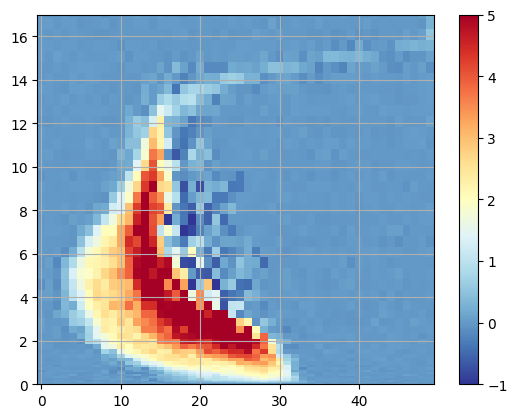

In [124]:

fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(fmse, z)
reconstructed_scale_image=reconstructed_images[10]*std_norm_data+mean_norm_data
plt.pcolormesh(XX,ZZ, reconstructed_scale_image,cmap='RdYlBu_r', vmin=-1, vmax=5)
plt.colorbar()
plt.grid(True)
plt.ylim(0,17)

(0.0, 17.0)

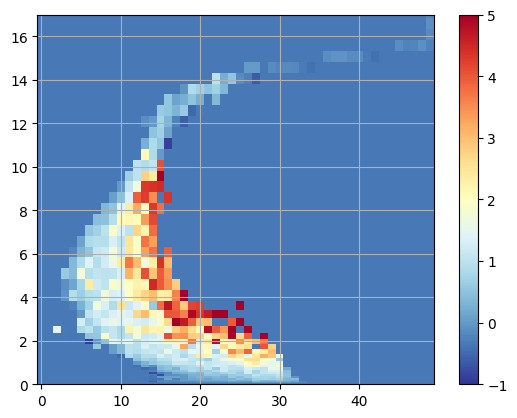

In [125]:

fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(fmse, z)
plt.pcolormesh(XX,ZZ, images[10][:-5].reshape(64, 50),cmap='RdYlBu_r', vmin=-1, vmax=5)
plt.colorbar()
plt.grid(True)
plt.ylim(0,17)


(0.0, 17.0)

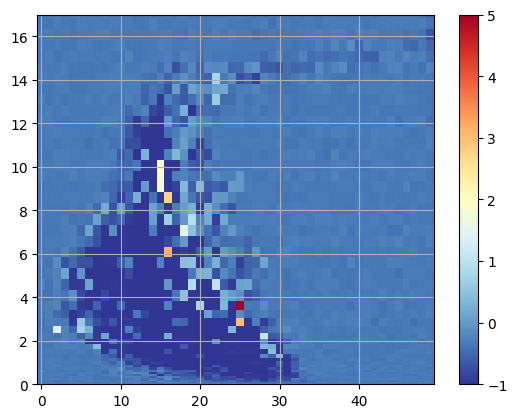

In [126]:

fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(fmse, z)
plt.pcolormesh(XX,ZZ, images[10][:-5].reshape(64, 50)-reconstructed_scale_image, cmap='RdYlBu_r', vmin=-1, vmax=5)
plt.colorbar()
plt.grid(True)
plt.ylim(0,17)

In [127]:
import torch
import torch.nn.functional as F
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Encode all data from the train_loader into the latent space (mu)
all_mu = []

# Loop over your train_loader to collect the latent means (mu)
vae.eval()  # Ensure the VAE is in evaluation mode
with torch.no_grad():
    for batch in train_loader:
        x = batch[0]  # assuming the data comes as (input, label) tuples
        x = x.to(device)  # Move input to the appropriate device
        mu, _ = vae.encode(x)  # Get the latent means (mu)
        all_mu.append(mu)

# Concatenate all mu's into one large tensor
all_mu = torch.cat(all_mu, dim=0)

# Perform k-means clustering on the latent means (mu)
nb_clusters = 3
kmeans = KMeans(n_clusters=nb_clusters)
kmeans.fit(all_mu.cpu().numpy())  # Convert to numpy for sklearn

# Get the barycenters (cluster centroids)
barycenters = kmeans.cluster_centers_

# Convert the barycenters back to torch tensors and move to the appropriate device
barycenters_tensor = torch.tensor(barycenters).float().to(device)

# Decode the barycenters to get the reconstructed images
with torch.no_grad():
    reconstructed_modes = vae.decode(barycenters_tensor)
    reconstructed_modes = reconstructed_modes[:,:-5].reshape(nb_clusters, nz, nX)


/burg/home/sga2133/miniconda3/envs/samenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


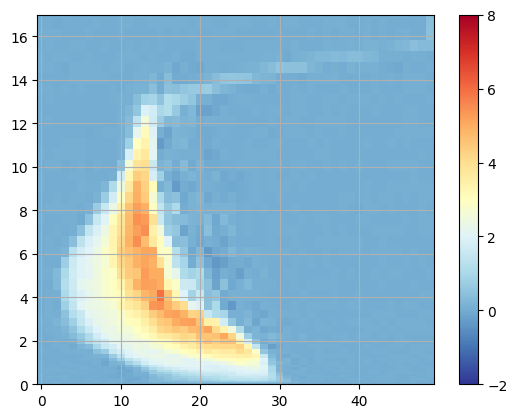

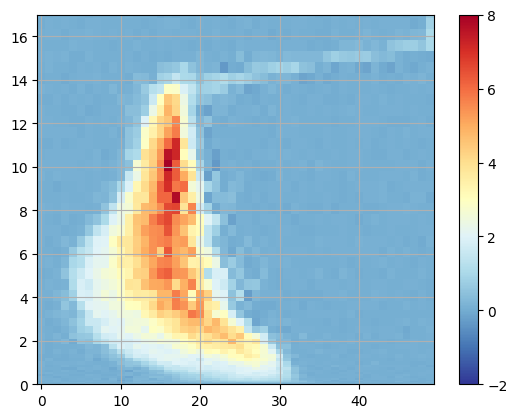

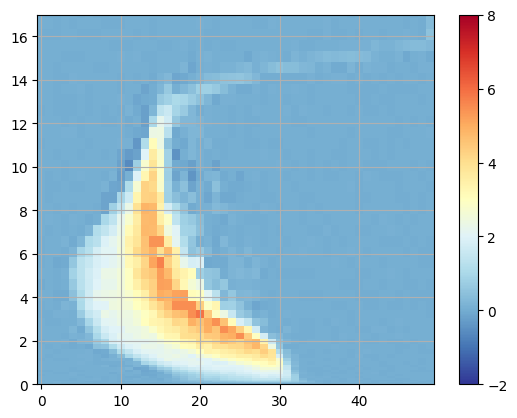

In [128]:

for mode in reconstructed_modes:
    fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
    XX,ZZ = np.meshgrid(fmse, z)
    #mode[np.absolute(mode)<0.5]=np.nan

    plt.pcolormesh(XX,ZZ, mode*std_norm_data+mean_norm_data,cmap='RdYlBu_r', vmin=-2, vmax=8)
    plt.colorbar()
    plt.grid(True)
    plt.ylim(0,17)
    plt.show()

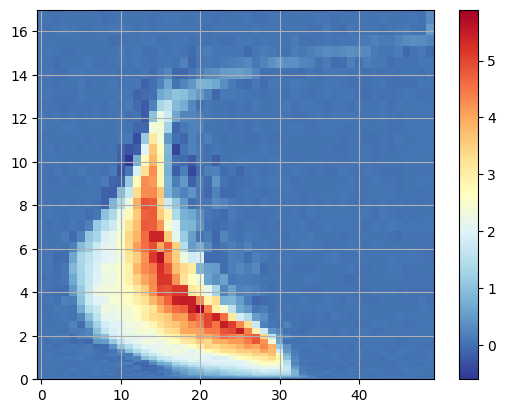

In [140]:


fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(fmse, z)
#mode[np.absolute(mode)<0.5]=np.nan

plt.pcolormesh(XX,ZZ, (reconstructed_modes[2])*std_norm_data+mean_norm_data,cmap='RdYlBu_r')#, vmin=-2, vmax=8)
plt.colorbar()
plt.grid(True)
plt.ylim(0,17)
plt.show()

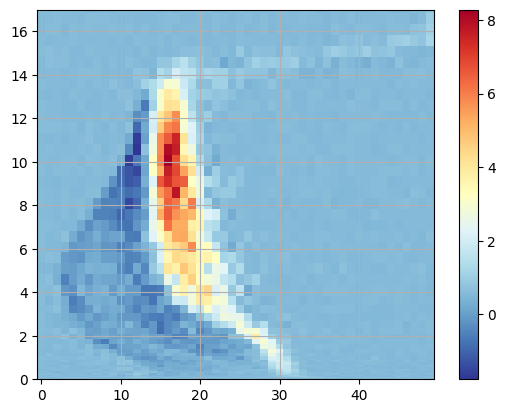

In [141]:


fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(fmse, z)
#mode[np.absolute(mode)<0.5]=np.nan

plt.pcolormesh(XX,ZZ, (reconstructed_modes[1]-reconstructed_modes[0])*std_norm_data+mean_norm_data,cmap='RdYlBu_r')#, vmin=-2, vmax=8)
plt.colorbar()
plt.grid(True)
plt.ylim(0,17)
plt.show()

In [66]:
simu_fmse-np.mean(simu_fmse)

NameError: name 'simu_fmse' is not defined

100%|███████████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.32s/it]


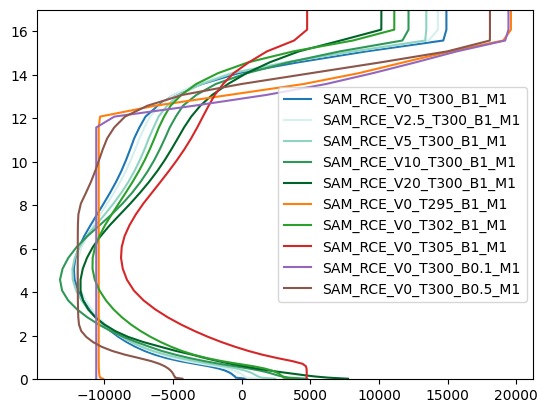

In [133]:
for simu in tqdm(simu_list):
    #plt.pcolormesh(XX,ZZ, simu.dataset_isentropic.RHO_W.values[10])
    simu_fmse = np.nanmean(simu.dataset_computed_3d.FMSE.values, axis=(0,2,3))
    plt.plot(simu_fmse-np.mean(simu_fmse), simu.dataset_3d.z.values/1000, label=simu.name, color=simu.color)
    plt.ylim(0,17)
plt.legend()
    #plt.show()

(array([3.07347215e+08, 7.87972600e+06, 4.70010000e+05, 7.41157100e+06,
        4.75976400e+06, 3.12637500e+06, 7.87664300e+06, 7.87968300e+06,
        7.87999400e+06, 1.49734075e+08]),
 array([320000., 323000., 326000., 329000., 332000., 335000., 338000.,
        341000., 344000., 347000., 350000.]),
 <BarContainer object of 10 artists>)

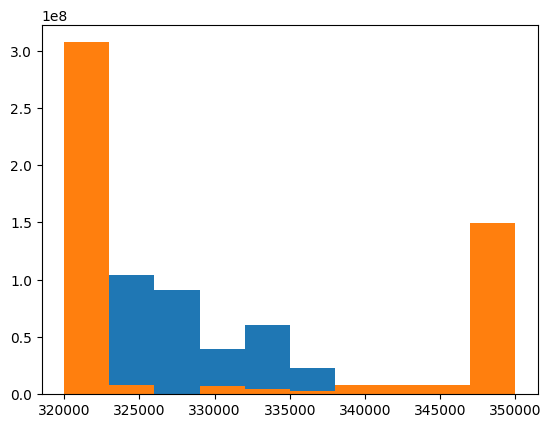

In [139]:
plt.hist(simu_list[0].dataset_computed_3d.FMSE.values.ravel())
plt.hist(simu_list[5].dataset_computed_3d.FMSE.values.ravel())

?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])


?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([32, 2])
?????? torch.Size([19, 2])
all_z.shape torch.Size([1683, 2])


/burg/home/sga2133/miniconda3/envs/samenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


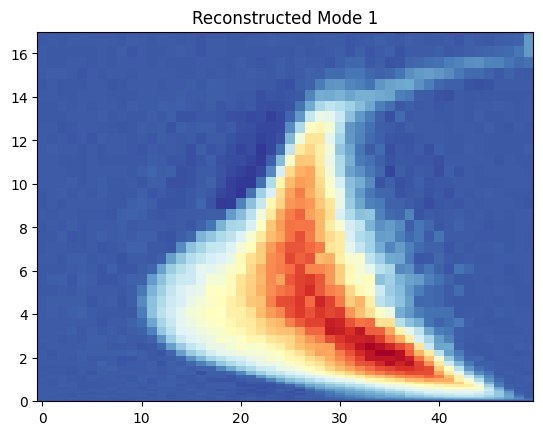

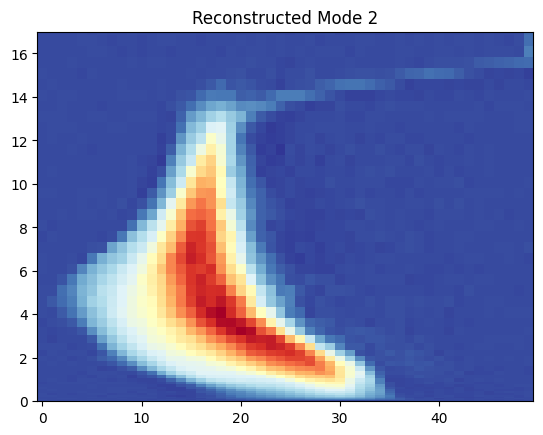

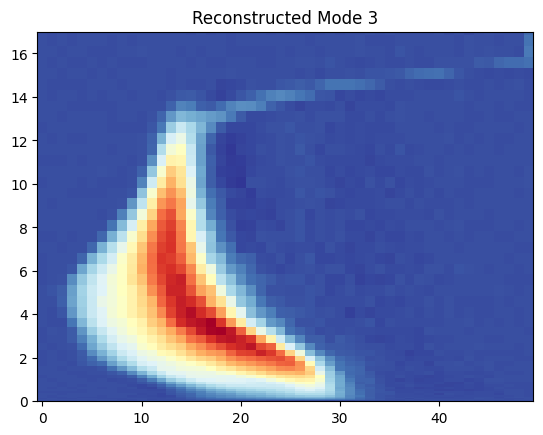

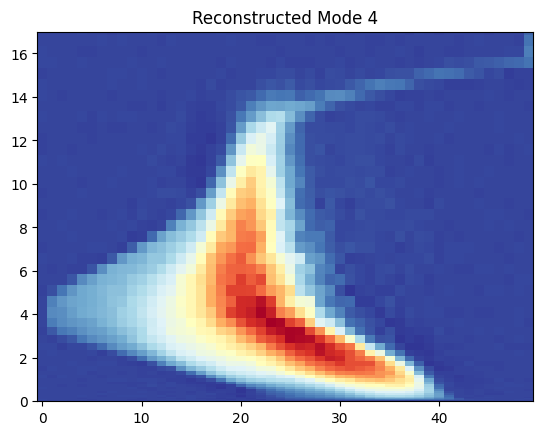

In [48]:
import torch
import torch.nn.functional as F
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Store all latent vectors (z from reparameterization)
all_z = []

# Set the VAE in evaluation mode
vae.eval()
with torch.no_grad():
    for batch in train_loader:
        x = batch[0]  # Assuming the data comes as (input, label) tuples
        x = x.to(device)  # Move input to the appropriate device
        
        # Encode the input and obtain both mean (mu) and log variance (logvar)
        mu, logvar = vae.encode(x)

        print('??????', mu.shape)
        
        # Perform reparameterization to get the latent vector z of size (batch_size, 100)
        z = vae.reparameterization(mu, logvar)
        
        # Store the latent vector (z)
        all_z.append(z)

# Concatenate all latent vectors (z) into one large tensor of shape (total_samples, 100)
all_z = torch.cat(all_z, dim=0)
print('all_z.shape',all_z.shape )

# Perform K-Means clustering on the full latent vectors (z)
nb_clusters = 4  # You can set the number of clusters to 4 for your analysis
kmeans = KMeans(n_clusters=nb_clusters)
kmeans.fit(all_z.cpu().numpy())  # Convert to numpy for sklearn K-Means

# Get the barycenters (cluster centroids) of shape (nb_clusters, 100)
barycenters = kmeans.cluster_centers_

# Convert the barycenters back to torch tensors and move to the appropriate device
barycenters_tensor = torch.tensor(barycenters).float().to(device)

# Decode the barycenters (latent space vectors) to get the reconstructed images
with torch.no_grad():
    reconstructed_modes = vae.decode(barycenters_tensor)
    # Assuming the original image shape is (channels, height, width), reshape accordingly
    reconstructed_modes = reconstructed_modes[:,:-5].reshape(nb_clusters, nz, nX)
# Plot or save the reconstructed modes (images)
for i in range(nb_clusters):
    plt.pcolormesh(XX,ZZ,reconstructed_modes[i], cmap='RdYlBu_r')  # Adjust if using RGB or grayscale
    plt.title(f"Reconstructed Mode {i+1}")
    plt.ylim(0,17)
    plt.show()



In [41]:
import torch
import torch.nn.functional as F
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Encode all data from the train_loader into the latent space (mu)
all_mu = []

# Set the VAE in evaluation mode
vae.eval()
with torch.no_grad():
    for batch in train_loader:
        x = batch[0]  # assuming the data comes as (input, label) tuples
        x = x.to(device)  # Move input to the appropriate device
        mu, _ = vae.encode(x)  # Get the latent means (mu)
        all_mu.append(mu)

# Concatenate all mu's into one large tensor
all_mu = torch.cat(all_mu, dim=0)

print('all_mu.shape', all_mu.shape)

# Perform PCA on the latent means (mu)
nb_components = 4  # Number of principal components you want to analyze
pca = PCA(n_components=nb_components)
principal_components = pca.fit_transform(all_mu.cpu().numpy())  # Convert to numpy for sklearn PCA

# Get the principal components' coordinates (analogous to barycenters in KMeans)
principal_modes = torch.tensor(pca.components_).float().to(device)  # Convert PCA components to torch tensors

# Decode the principal components to get the reconstructed images (modes)
with torch.no_grad():
    reconstructed_modes = vae.decode(principal_modes)
    reconstructed_modes = reconstructed_modes[:,:-5].reshape(nb_components, nz, nX)  # Reshape based on your data dimensions

# Plot or save the reconstructed modes (images)
for i in range(nb_components):
    plt.pcolormesh(XX,ZZ, reconstructed_modes[i].cpu().numpy(), cmap='RdYlBu_r')
    plt.title(f"Reconstructed Mode {i+1}")
    plt.ylim(0,17)
    plt.show()


all_mu.shape torch.Size([1683, 2])


ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

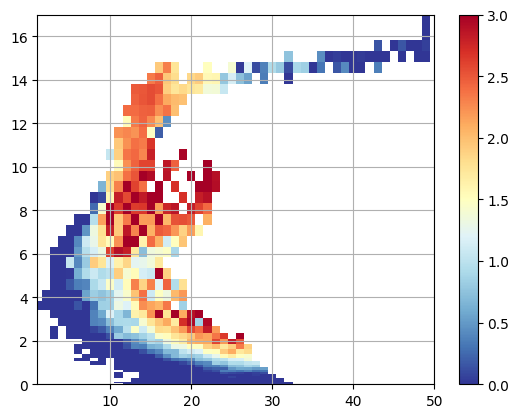

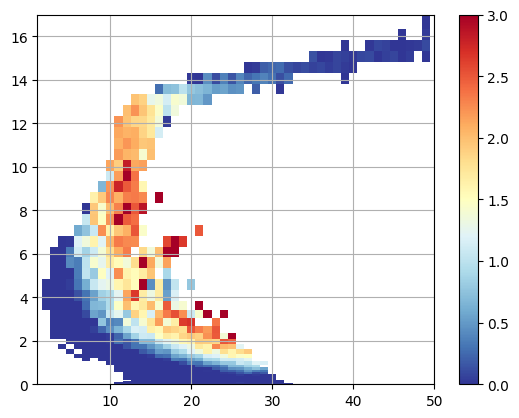

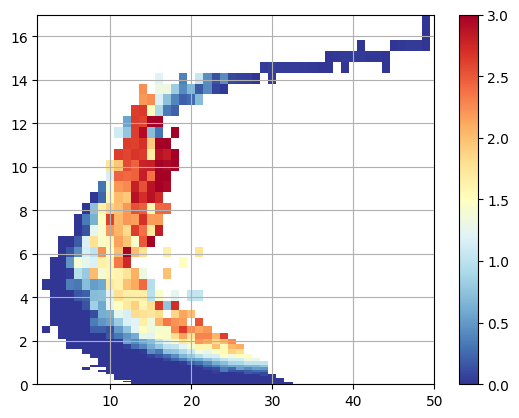

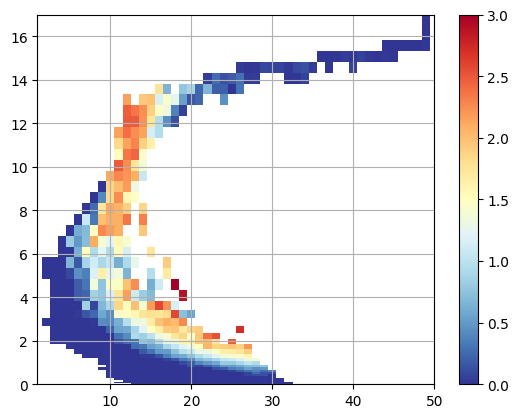

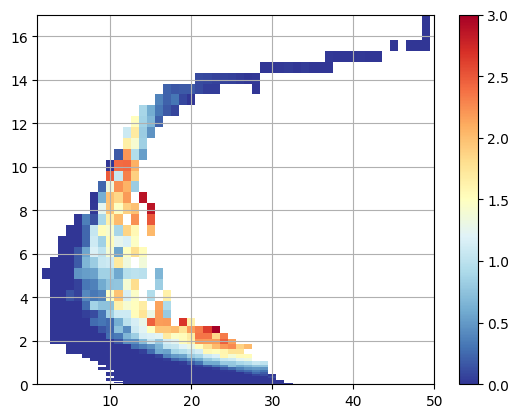

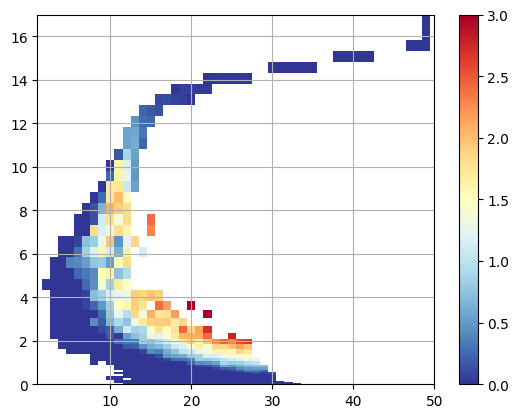

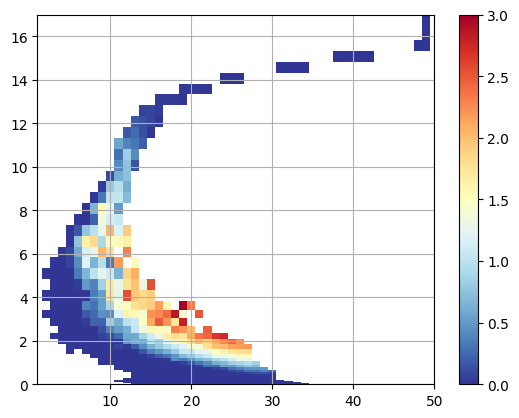

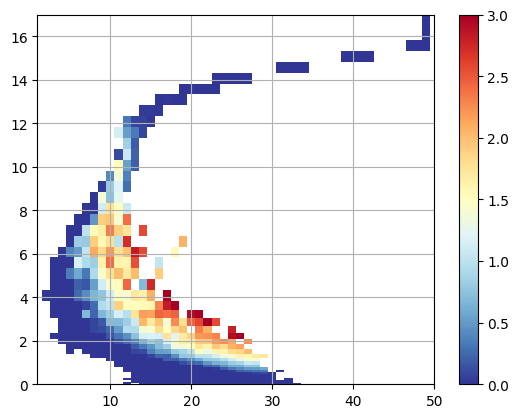

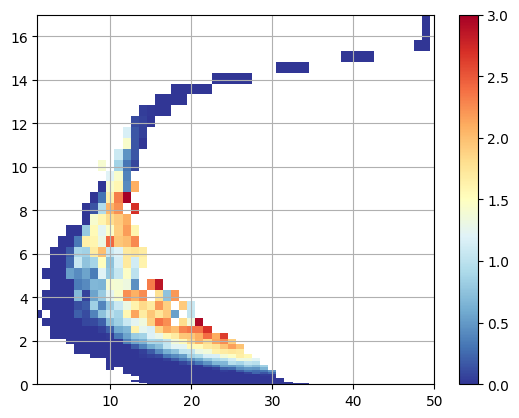

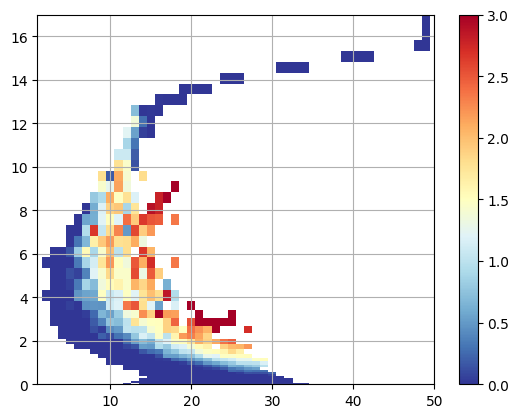

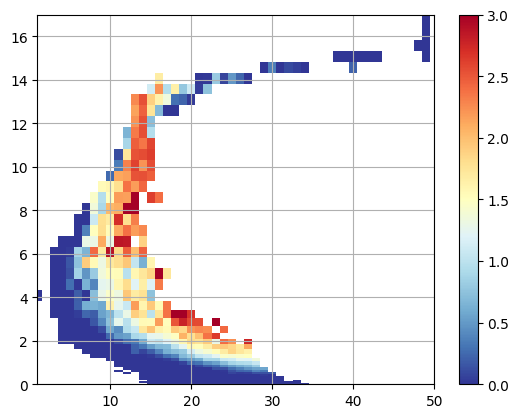

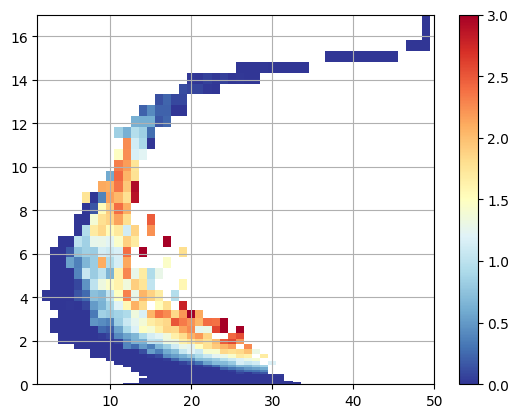

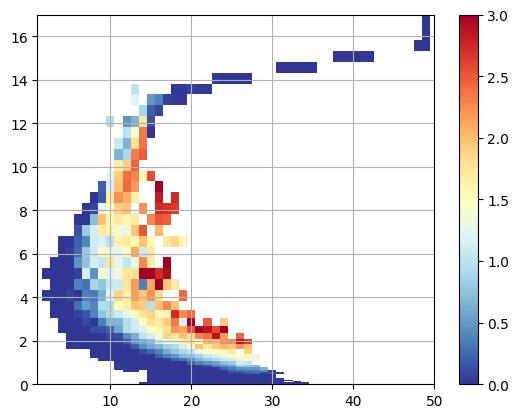

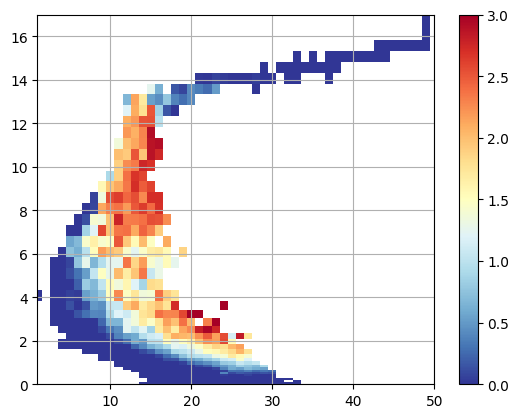

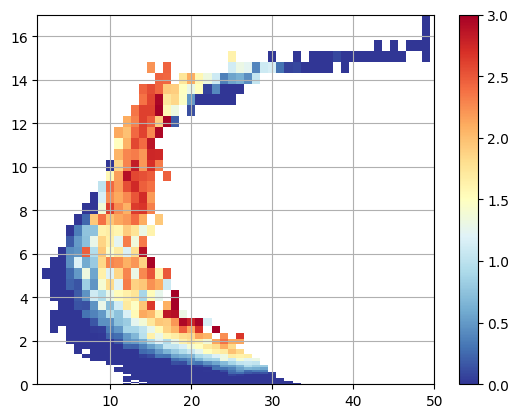

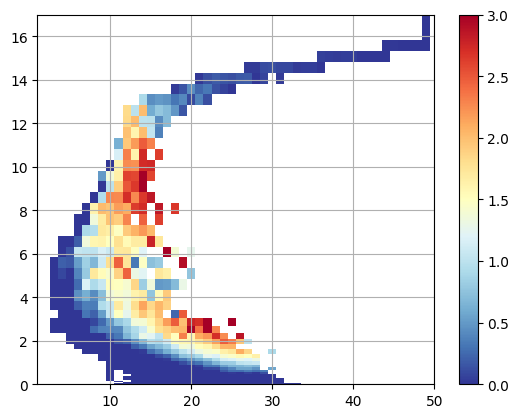

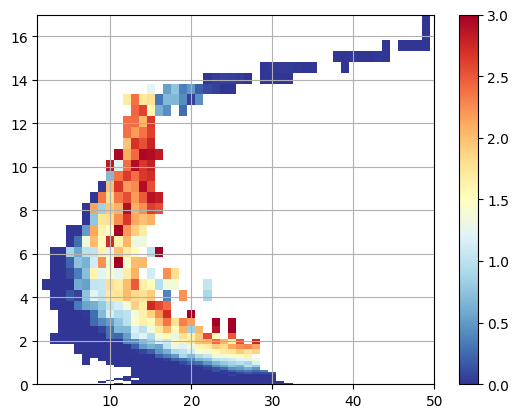

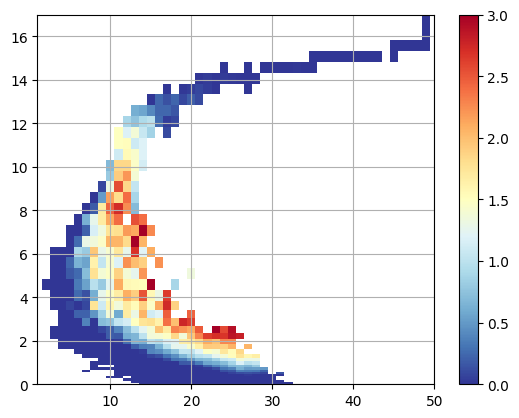

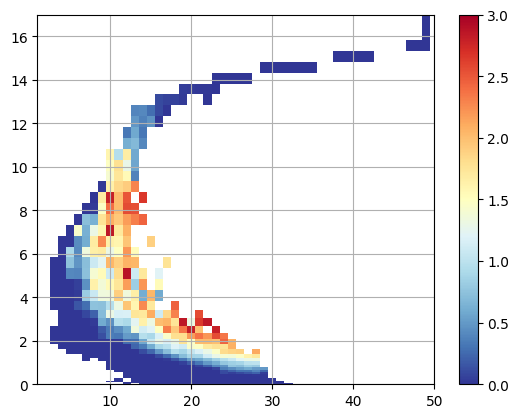

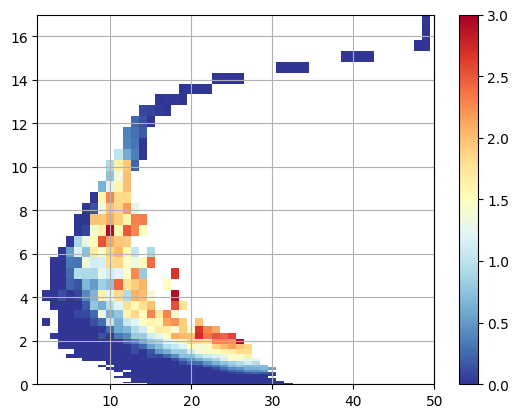

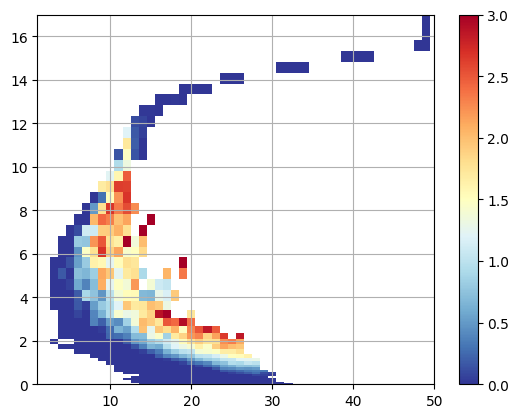

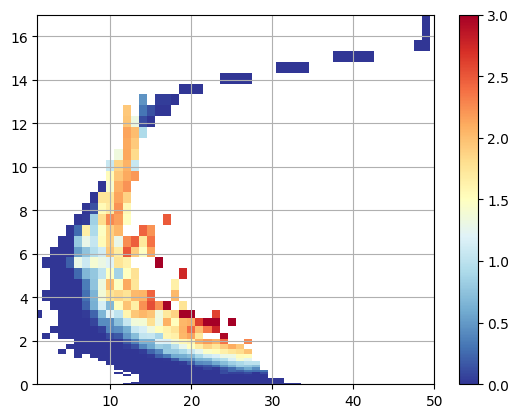

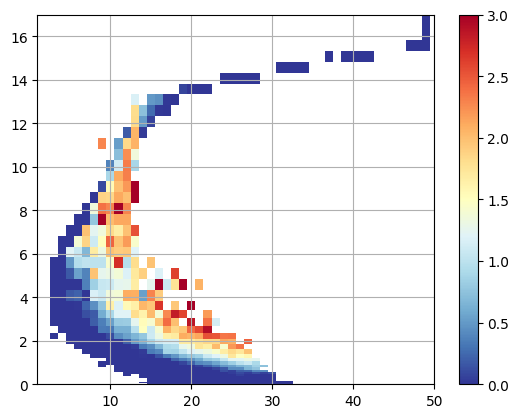

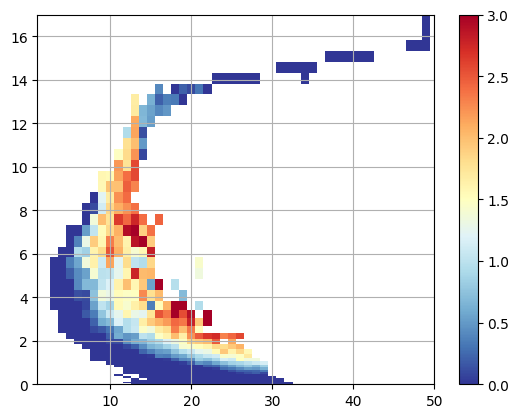

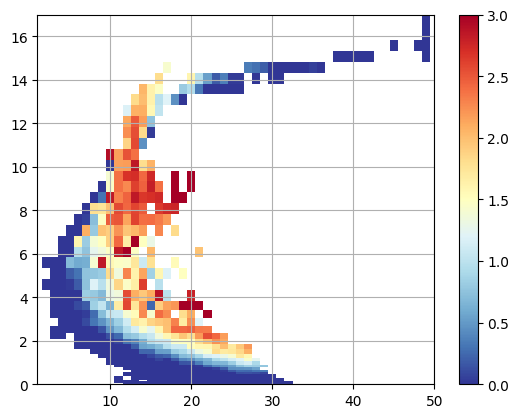

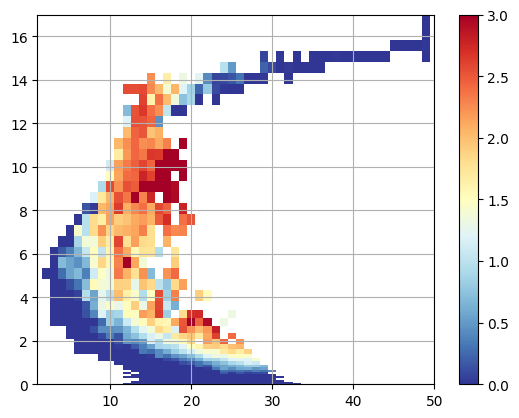

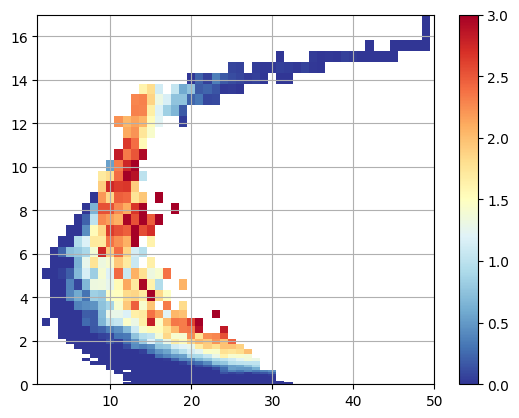

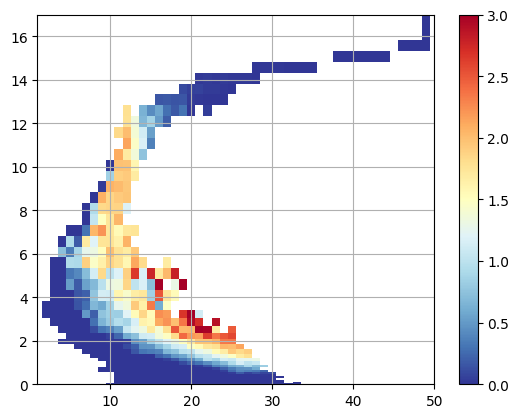

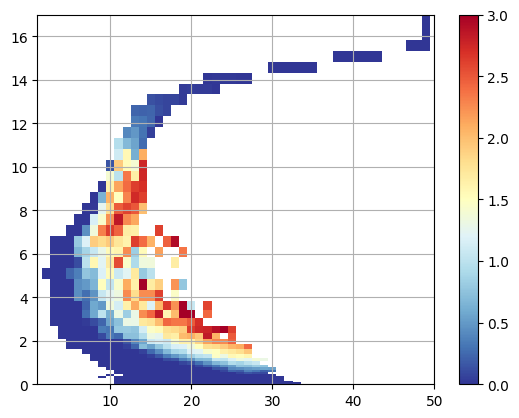

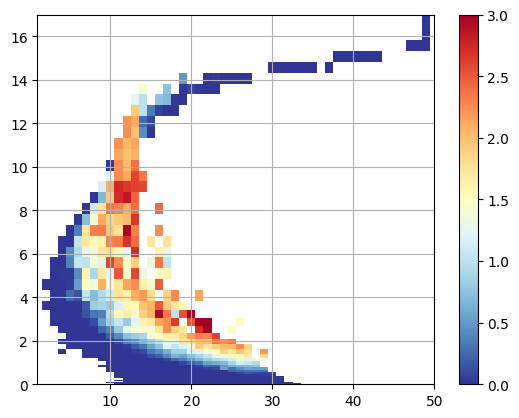

In [114]:
for i in range(30):
    fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
    XX,ZZ = np.meshgrid(fmse, z)
    plt.pcolormesh(XX,ZZ, simu_list[0].dataset_isentropic.QN[50+i],cmap='RdYlBu_r', vmin=0, vmax=3)
    plt.colorbar()
    plt.grid(True)
    plt.ylim(0,17)
    plt.xlim(1,50)
    plt.show()

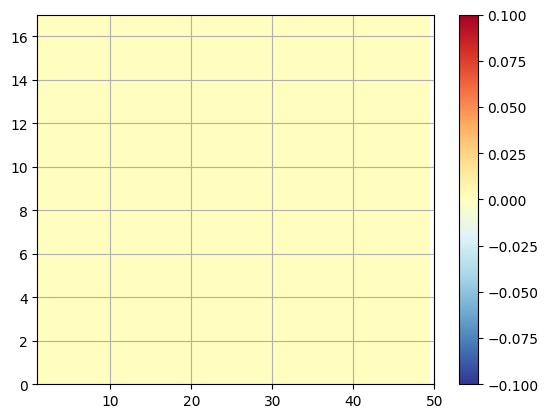

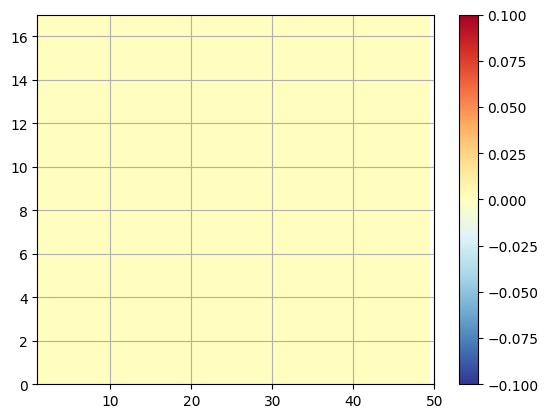

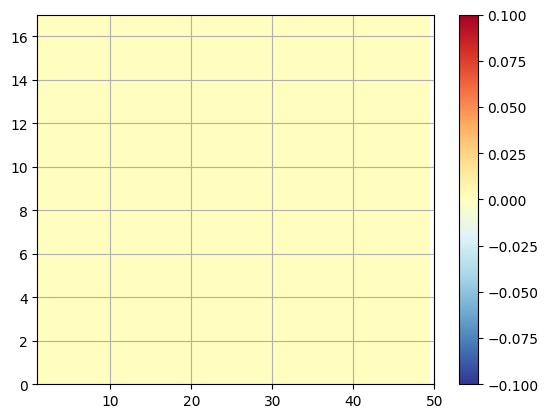

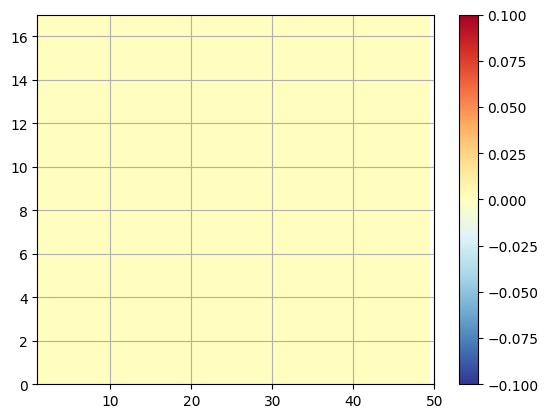

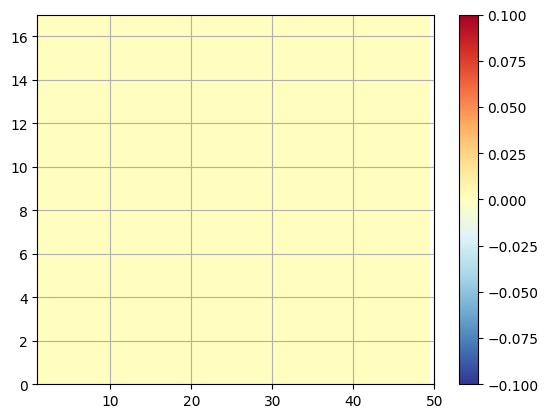

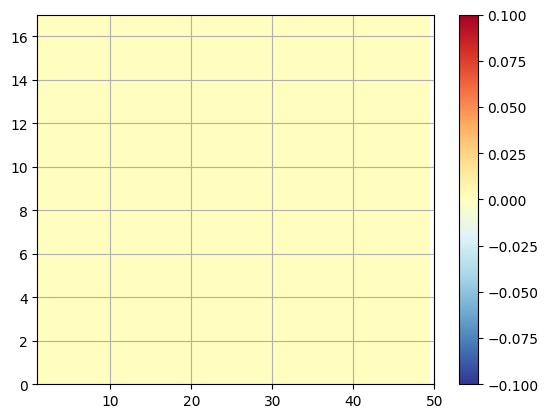

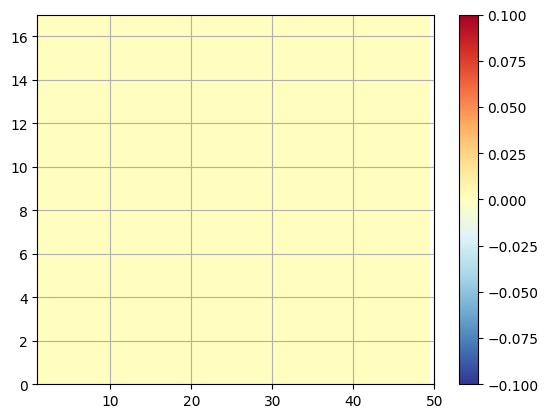

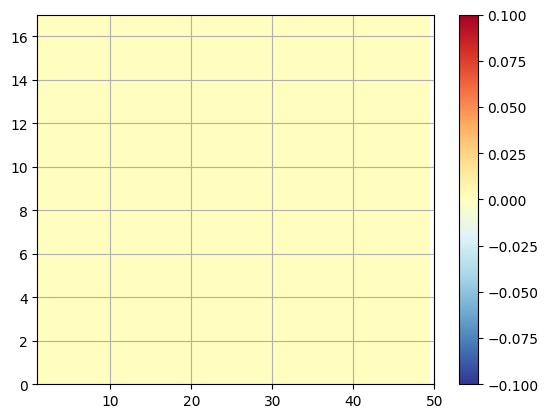

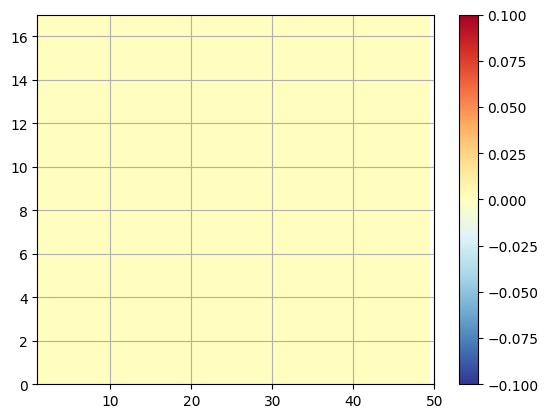

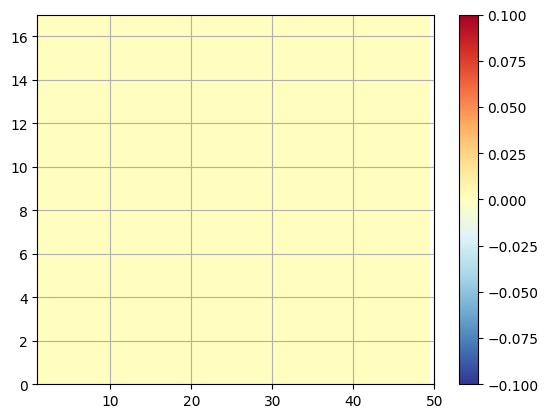

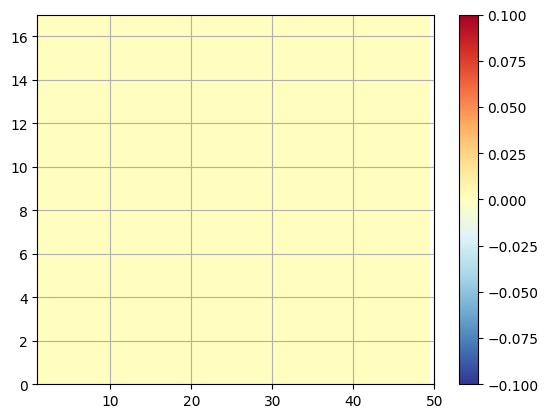

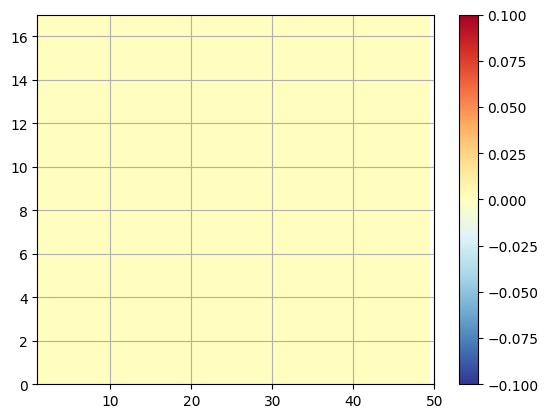

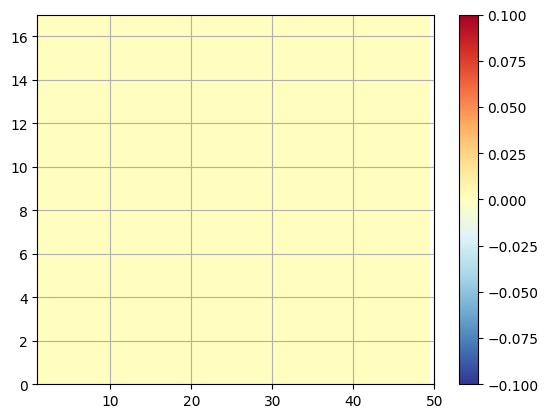

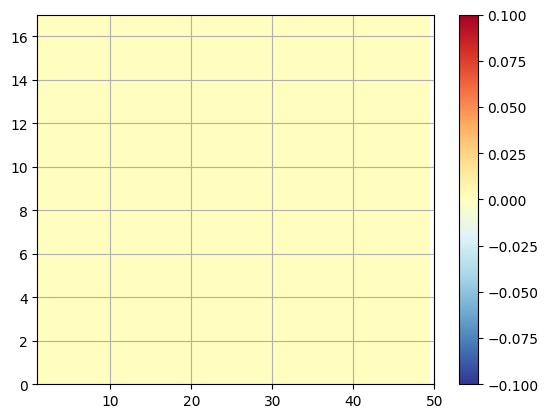

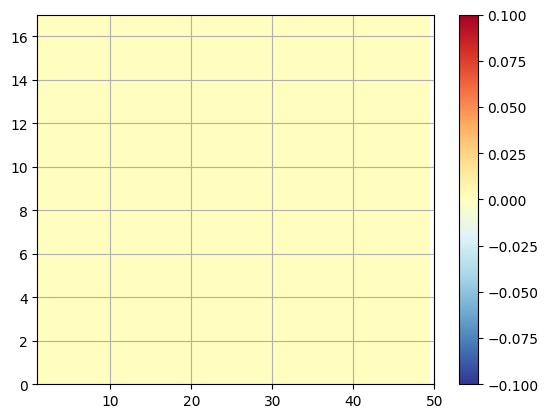

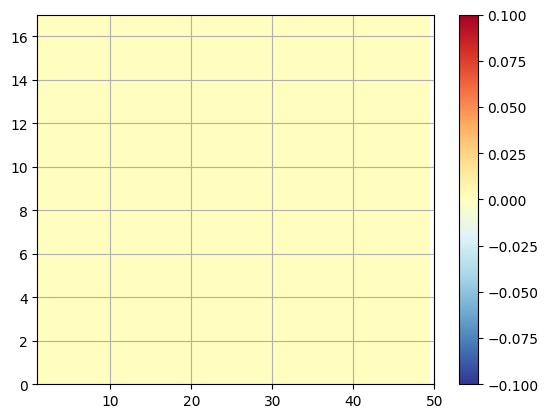

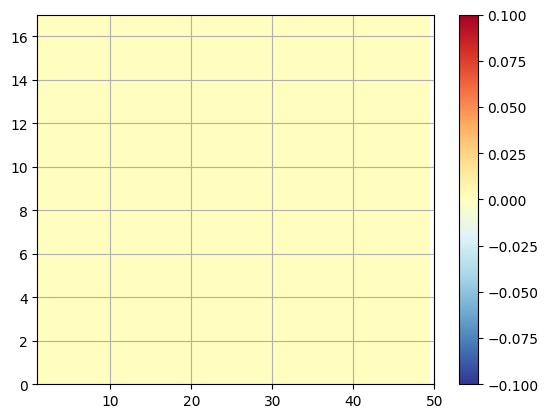

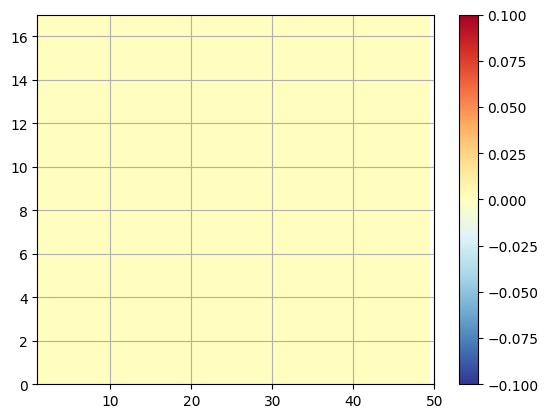

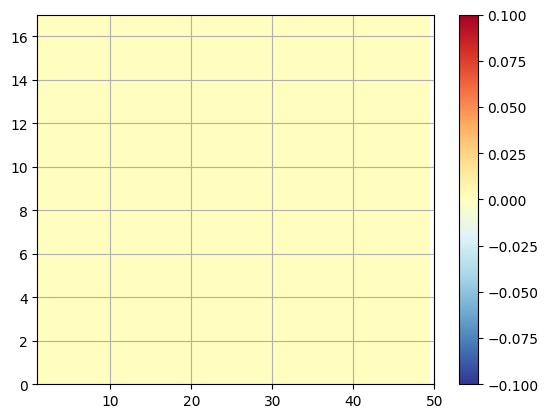

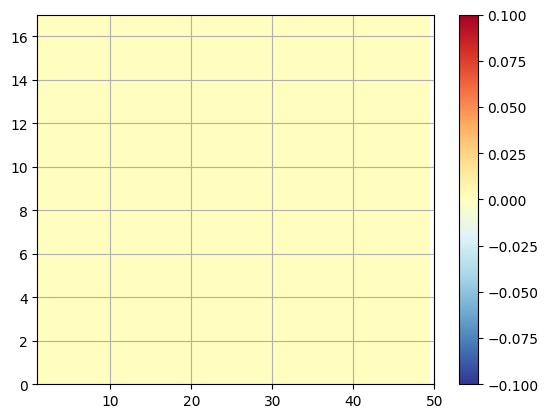

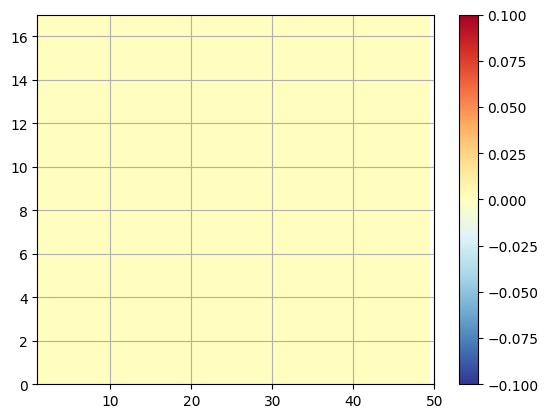

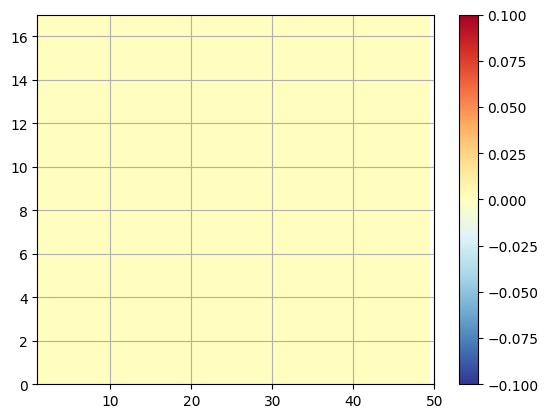

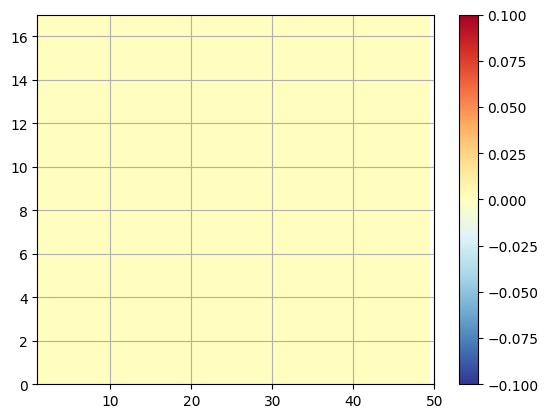

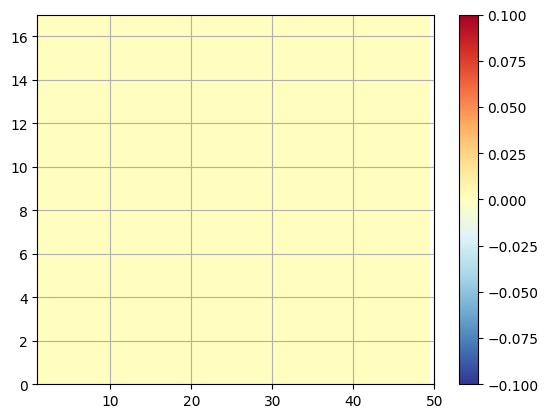

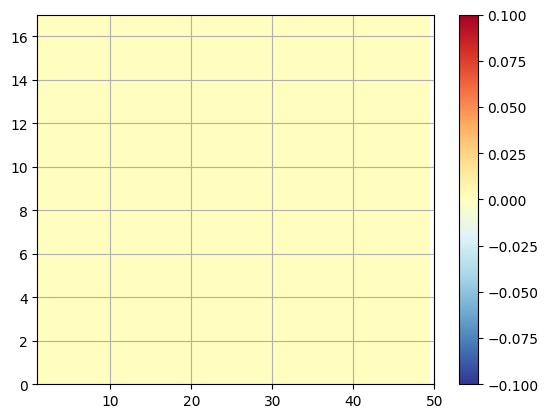

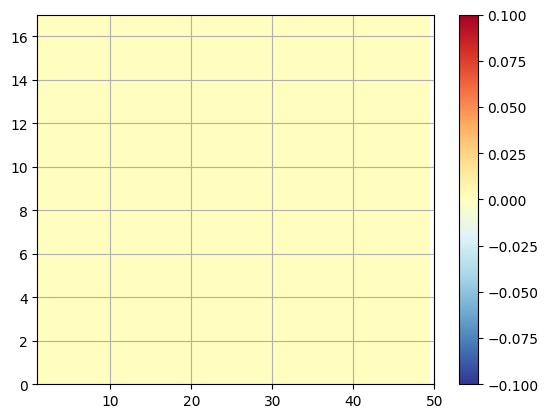

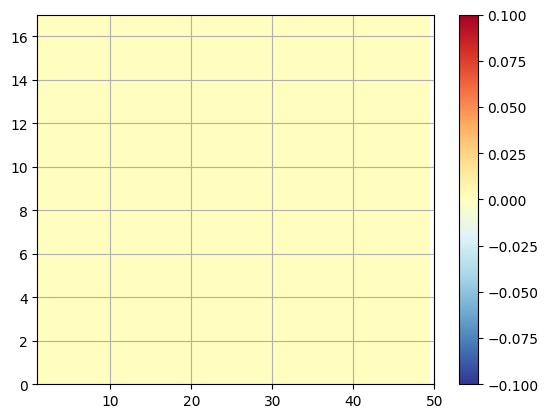

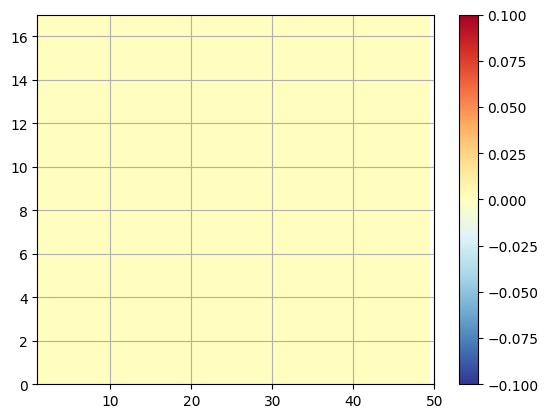

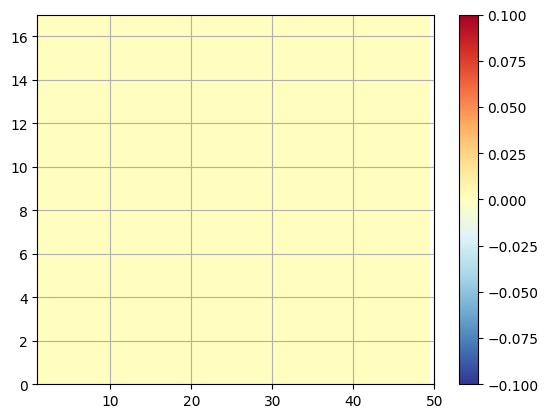

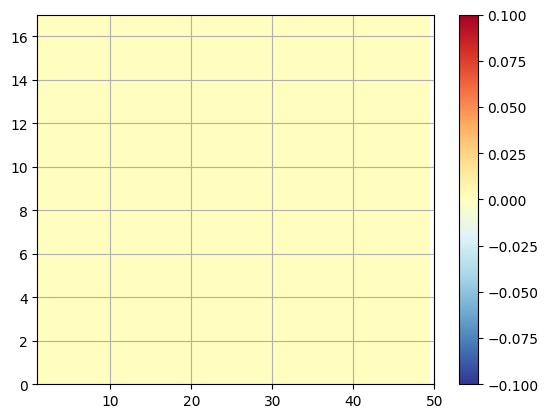

In [123]:
for i in range(30):
    fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
    XX,ZZ = np.meshgrid(fmse, z)
    where_nan = np.where(simu_list[0].dataset_isentropic.RHO_W[50+i]!=np.nan)
    zeros_mat = np.ones_like(simu_list[0].dataset_isentropic.RHO_W[50+i])
    zeros_mat[where_nan] = 0
    plt.pcolormesh(XX,ZZ, zeros_mat,cmap='RdYlBu_r')
    plt.colorbar()
    plt.grid(True)
    plt.ylim(0,17)
    plt.xlim(1,50)
    plt.show()